**Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.**

First, load the dataset.

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
#First, load the dataset.
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_exp = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [3]:
#Detect the problems with the data such as missing values and outliers. Are there any nonsense values
#that seem to be stemmed from the data collection? For the missing values, discuss which technique 
#would be the most suitable one in filling out these values. Regarding the outliers, discuss their 
#potential effects on your analysis and select an appropriate method to deal with them.

In [4]:
life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_exp.shape

(2938, 22)

In [6]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [7]:
life_exp.columns = map(str.lower, life_exp.columns)

In [8]:
life_exp.columns

Index(['country', 'year', 'status', 'life expectancy ', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles ', ' bmi ', 'under-five deaths ', 'polio', 'total expenditure',
       'diphtheria ', ' hiv/aids', 'gdp', 'population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'income composition of resources', 'schooling'],
      dtype='object')

In [9]:
life_exp = life_exp.rename(columns=lambda x: x.strip())

In [10]:
life_exp.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [11]:
life_exp['country'] = life_exp.country.str.lower()

In [12]:
life_exp['status'] = life_exp.status.str.lower()

In [13]:
life_exp.nunique()

country                             193
year                                 16
status                                2
life expectancy                     362
adult mortality                     425
infant deaths                       209
alcohol                            1076
percentage expenditure             2328
hepatitis b                          87
measles                             958
bmi                                 608
under-five deaths                   252
polio                                73
total expenditure                   818
diphtheria                           81
hiv/aids                            200
gdp                                2490
population                         2278
thinness  1-19 years                200
thinness 5-9 years                  207
income composition of resources     625
schooling                           173
dtype: int64

In [14]:
life_exp.isnull().sum()*100/life_exp.isnull().count()

country                             0.000000
year                                0.000000
status                              0.000000
life expectancy                     0.340368
adult mortality                     0.340368
infant deaths                       0.000000
alcohol                             6.603131
percentage expenditure              0.000000
hepatitis b                        18.822328
measles                             0.000000
bmi                                 1.157250
under-five deaths                   0.000000
polio                               0.646698
total expenditure                   7.692308
diphtheria                          0.646698
hiv/aids                            0.000000
gdp                                15.248468
population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
income composition of resources     5.684139
schooling                           5.547992
dtype: flo

In [15]:
num_columns = life_exp.select_dtypes(['int64', 'float64']).columns

for column in num_columns:
    life_exp[column].fillna(life_exp[column].mean(), inplace=True)

In [16]:
life_exp.isnull().sum()*100/life_exp.isnull().count()

country                            0.0
year                               0.0
status                             0.0
life expectancy                    0.0
adult mortality                    0.0
infant deaths                      0.0
alcohol                            0.0
percentage expenditure             0.0
hepatitis b                        0.0
measles                            0.0
bmi                                0.0
under-five deaths                  0.0
polio                              0.0
total expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness  1-19 years               0.0
thinness 5-9 years                 0.0
income composition of resources    0.0
schooling                          0.0
dtype: float64

In [17]:
from scipy.stats.mstats import winsorize
life_exp['winsorized_life expectancy'] = winsorize(life_exp['life expectancy'], (0.05, 0))
life_exp['winsorized_infant deaths'] = winsorize(life_exp['infant deaths'], (0.05, 0.10))
life_exp['winsorized_percentage expenditure'] = winsorize(life_exp['percentage expenditure'], (0.05, 0.15))
life_exp['winsorized_measles'] = winsorize(life_exp['measles'], (0.05, 0.20))
life_exp['winsorized_under-five deaths'] = winsorize(life_exp['under-five deaths'], (0.05, 0.15))
life_exp['winsorized_hiv/aids'] = winsorize(life_exp['hiv/aids'], (0.05, 0.20))
life_exp['winsorized_gdp'] = winsorize(life_exp['gdp'], (0.05, 0.10))
life_exp['winsorized_population'] = winsorize(life_exp['population'], (0.05, 0.10))
life_exp['winsorized_hepatitis b'] = winsorize(life_exp['hepatitis b'], (0.10, 0.10))
life_exp['winsorized_polio'] = winsorize(life_exp['polio'], (0.10, 0.10))
life_exp['winsorized_diphtheria'] = winsorize(life_exp['diphtheria'], (0.10, 0.10))
life_exp['winsorized_thinness  1-19 years'] = winsorize(life_exp['thinness  1-19 years'], (0, 0.10))
life_exp['winsorized_thinness 5-9 years'] = winsorize(life_exp['thinness 5-9 years'], (0, 0.10))
life_exp['winsorized_total expenditure'] = winsorize(life_exp['total expenditure'], (0, 0.10))
life_exp['winsorized_adult mortality'] = winsorize(life_exp['adult mortality'], (0, 0.10))
life_exp['winsorized_schooling'] = winsorize(life_exp['schooling'], (0.05, 0))

winsorized_year does not exist
winsorized_alcohol does not exist
winsorized_bmi does not exist
winsorized_income composition of resources does not exist


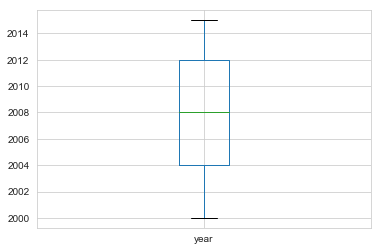

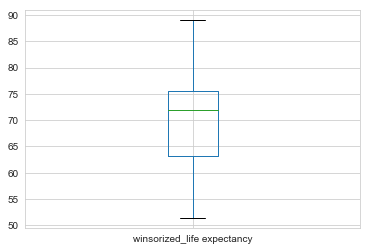

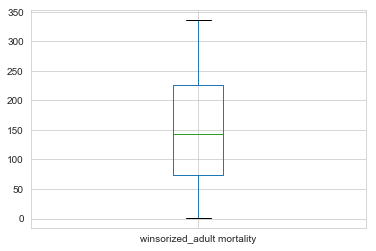

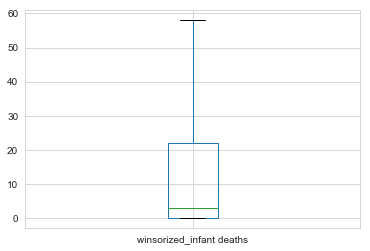

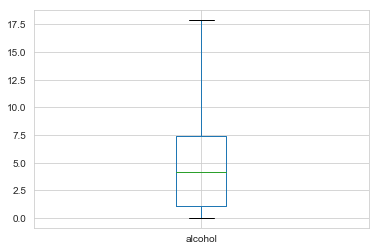

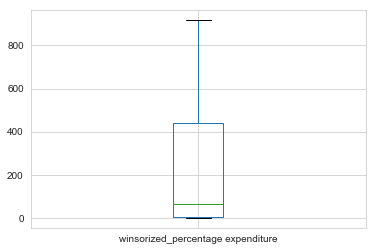

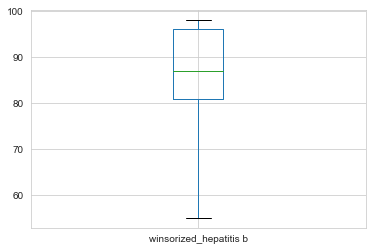

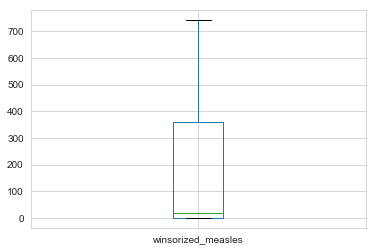

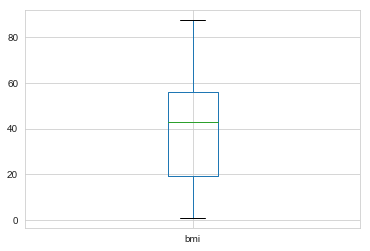

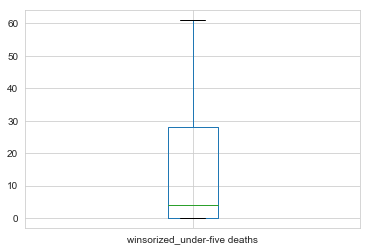

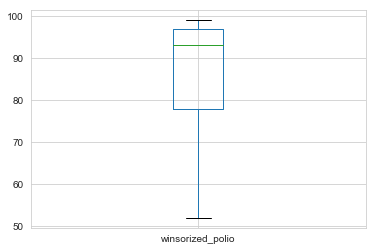

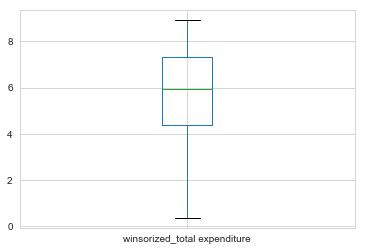

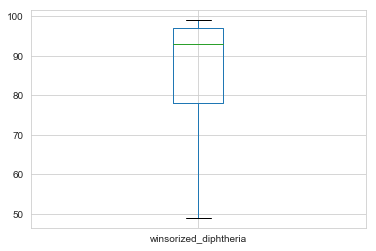

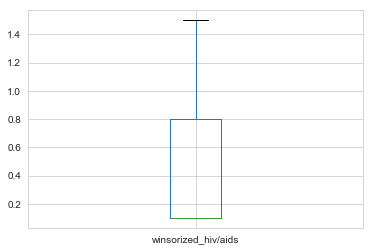

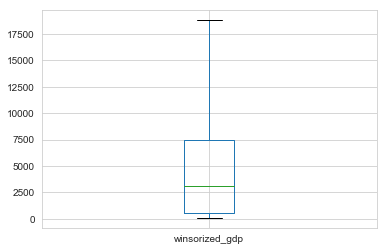

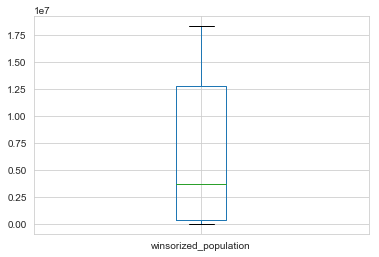

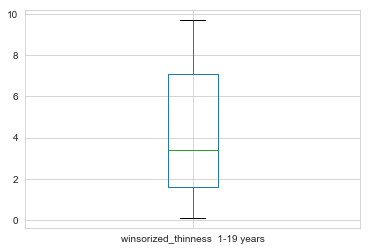

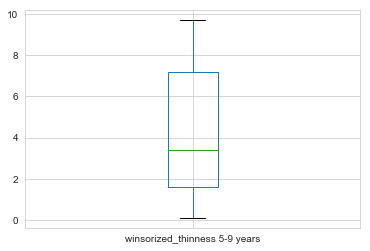

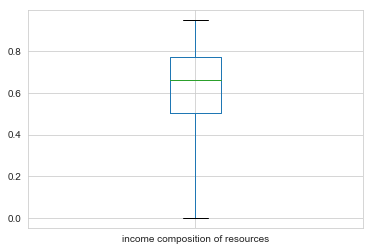

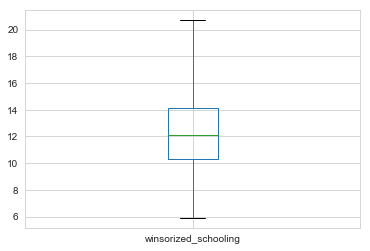

In [18]:
for column in num_columns:
    winsorized_column = "winsorized_" + column
    plt.figure()
    try:
        life_exp.boxplot([winsorized_column], whis=2.0)
    except:
        print(f"{winsorized_column} does not exist")
        life_exp.boxplot([column], whis=2.0)
plt.show()

In [19]:
life_exp.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,winsorized_gdp,winsorized_population,winsorized_hepatitis b,winsorized_polio,winsorized_diphtheria,winsorized_thinness 1-19 years,winsorized_thinness 5-9 years,winsorized_total expenditure,winsorized_adult mortality,winsorized_schooling
0,afghanistan,2015,developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,18294611.0,65.0,52.0,65.0,9.7,9.7,8.16,263.0,10.1
1,afghanistan,2014,developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,62.0,58.0,62.0,9.7,9.7,8.18,271.0,10.0
2,afghanistan,2013,developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,18294611.0,64.0,62.0,64.0,9.7,9.7,8.13,268.0,9.9
3,afghanistan,2012,developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,67.0,67.0,67.0,9.7,9.7,8.52,272.0,9.8
4,afghanistan,2011,developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,81.683884,2978599.0,68.0,68.0,68.0,9.7,9.7,7.87,275.0,9.5


In [20]:
life_exp['country'].unique()

array(['afghanistan', 'albania', 'algeria', "côte d'ivoire", 'angola',
       'antigua and barbuda', 'argentina', 'armenia', 'australia',
       'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh',
       'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bhutan',
       'bolivia (plurinational state of)', 'bosnia and herzegovina',
       'botswana', 'brazil', 'brunei darussalam', 'bulgaria',
       'burkina faso', 'burundi', 'cabo verde', 'cambodia', 'cameroon',
       'canada', 'central african republic', 'chad', 'chile', 'china',
       'colombia', 'comoros', 'congo', 'cook islands', 'costa rica',
       'croatia', 'cuba', 'cyprus', 'czechia',
       "democratic people's republic of korea",
       'democratic republic of the congo', 'denmark', 'djibouti',
       'dominica', 'dominican republic', 'ecuador', 'egypt',
       'el salvador', 'slovakia', 'equatorial guinea', 'eritrea',
       'estonia', 'ethiopia', 'fiji', 'finland', 'france', 'gabon',
       'gambia', 'georgia

In [21]:
life_exp.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,...,winsorized_gdp,winsorized_population,winsorized_hepatitis b,winsorized_polio,winsorized_diphtheria,winsorized_thinness 1-19 years,winsorized_thinness 5-9 years,winsorized_total expenditure,winsorized_adult mortality,winsorized_schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,5241.605077,6.638042e+06,84.207309,85.528065,85.182150,4.334496,4.341692,5.776535,155.205230,12.090683
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,5815.569576,6.580907e+06,13.453754,15.265517,15.895434,3.142094,3.155859,2.045229,101.258628,3.008691
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,81.683884,1.457700e+04,55.000000,52.000000,49.000000,0.100000,0.100000,0.370000,1.000000,5.900000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,580.486996,4.189172e+05,80.940461,78.000000,78.000000,1.600000,1.600000,4.370000,74.000000,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,3116.561755,3.675929e+06,87.000000,93.000000,93.000000,3.400000,3.400000,5.938190,144.000000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,7483.158469,1.275338e+07,96.000000,97.000000,97.000000,7.100000,7.200000,7.330000,227.000000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,18784.948500,1.829461e+07,98.000000,99.000000,99.000000,9.700000,9.700000,8.910000,336.000000,20.700000


In [22]:
life_exp.describe(include=['O'])

,country,status
count,2938,2938
unique,193,2
top,nigeria,developing
freq,16,2426


In [23]:
life_exp[life_exp.country=='guyana']

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,winsorized_gdp,winsorized_population,winsorized_hepatitis b,winsorized_polio,winsorized_diphtheria,winsorized_thinness 1-19 years,winsorized_thinness 5-9 years,winsorized_total expenditure,winsorized_adult mortality,winsorized_schooling
1107,guyana,2015,developing,66.2,215.0,0,4.602861,0.000000,95.000000,0,...,4136.689919,768514.0,95.000000,92.0,95.0,5.5,5.3,5.93819,215.0,10.3
1108,guyana,2014,developing,66.0,217.0,0,7.640000,4.141293,98.000000,0,...,81.683884,763393.0,98.000000,97.0,98.0,5.5,5.3,5.25000,217.0,10.3
1109,guyana,2013,developing,65.9,218.0,0,7.560000,345.904426,98.000000,0,...,3944.178173,75881.0,98.000000,98.0,98.0,5.5,5.3,5.10000,218.0,10.3
1110,guyana,2012,developing,65.8,22.0,0,7.570000,497.471946,97.000000,0,...,3785.935665,75391.0,97.000000,97.0,97.0,5.6,5.3,6.57000,22.0,10.6
1111,guyana,2011,developing,65.6,229.0,0,7.560000,536.233252,93.000000,0,...,3439.597513,14577.0,93.000000,93.0,93.0,5.6,5.3,6.80000,229.0,10.3
1112,guyana,2010,developing,65.9,221.0,0,7.520000,48.028594,95.000000,0,...,326.281212,746556.0,95.000000,95.0,95.0,5.6,5.3,6.60000,221.0,10.2
1113,guyana,2009,developing,66.1,218.0,0,7.490000,466.669370,98.000000,0,...,2716.352560,745693.0,98.000000,97.0,98.0,5.6,5.4,7.32000,218.0,10.5
1114,guyana,2008,developing,66.3,218.0,1,7.320000,493.327929,93.000000,0,...,2576.124957,746314.0,93.000000,93.0,93.0,5.6,5.4,7.46000,218.0,10.7
1115,guyana,2007,developing,65.7,232.0,1,7.200000,362.870227,94.000000,0,...,2327.583240,747869.0,94.000000,94.0,94.0,5.7,5.5,6.45000,232.0,11.2
1116,guyana,2006,developing,65.2,24.0,1,7.040000,170.632584,93.000000,0,...,1945.639500,74961.0,93.000000,92.0,93.0,5.7,5.5,4.67000,24.0,11.7


In [24]:
life_exp.groupby("country")["country"].count()

country
afghanistan                                             16
albania                                                 16
algeria                                                 16
angola                                                  16
antigua and barbuda                                     16
argentina                                               16
armenia                                                 16
australia                                               16
austria                                                 16
azerbaijan                                              16
bahamas                                                 16
bahrain                                                 16
bangladesh                                              16
barbados                                                16
belarus                                                 16
belgium                                                 16
belize                                          

In [25]:
feature_list = ['life expectancy','alcohol','bmi','gdp', 'population', 'income composition of resources', 
    'schooling', 'winsorized_infant deaths', 'winsorized_percentage expenditure', 'winsorized_measles', 'winsorized_under-five deaths',
       'winsorized_hiv/aids', 'winsorized_gdp', 'winsorized_population','winsorized_hepatitis b', 'winsorized_polio', 'winsorized_diphtheria',
    'winsorized_thinness  1-19 years', 'winsorized_thinness 5-9 years',
       'winsorized_total expenditure', 'winsorized_adult mortality']

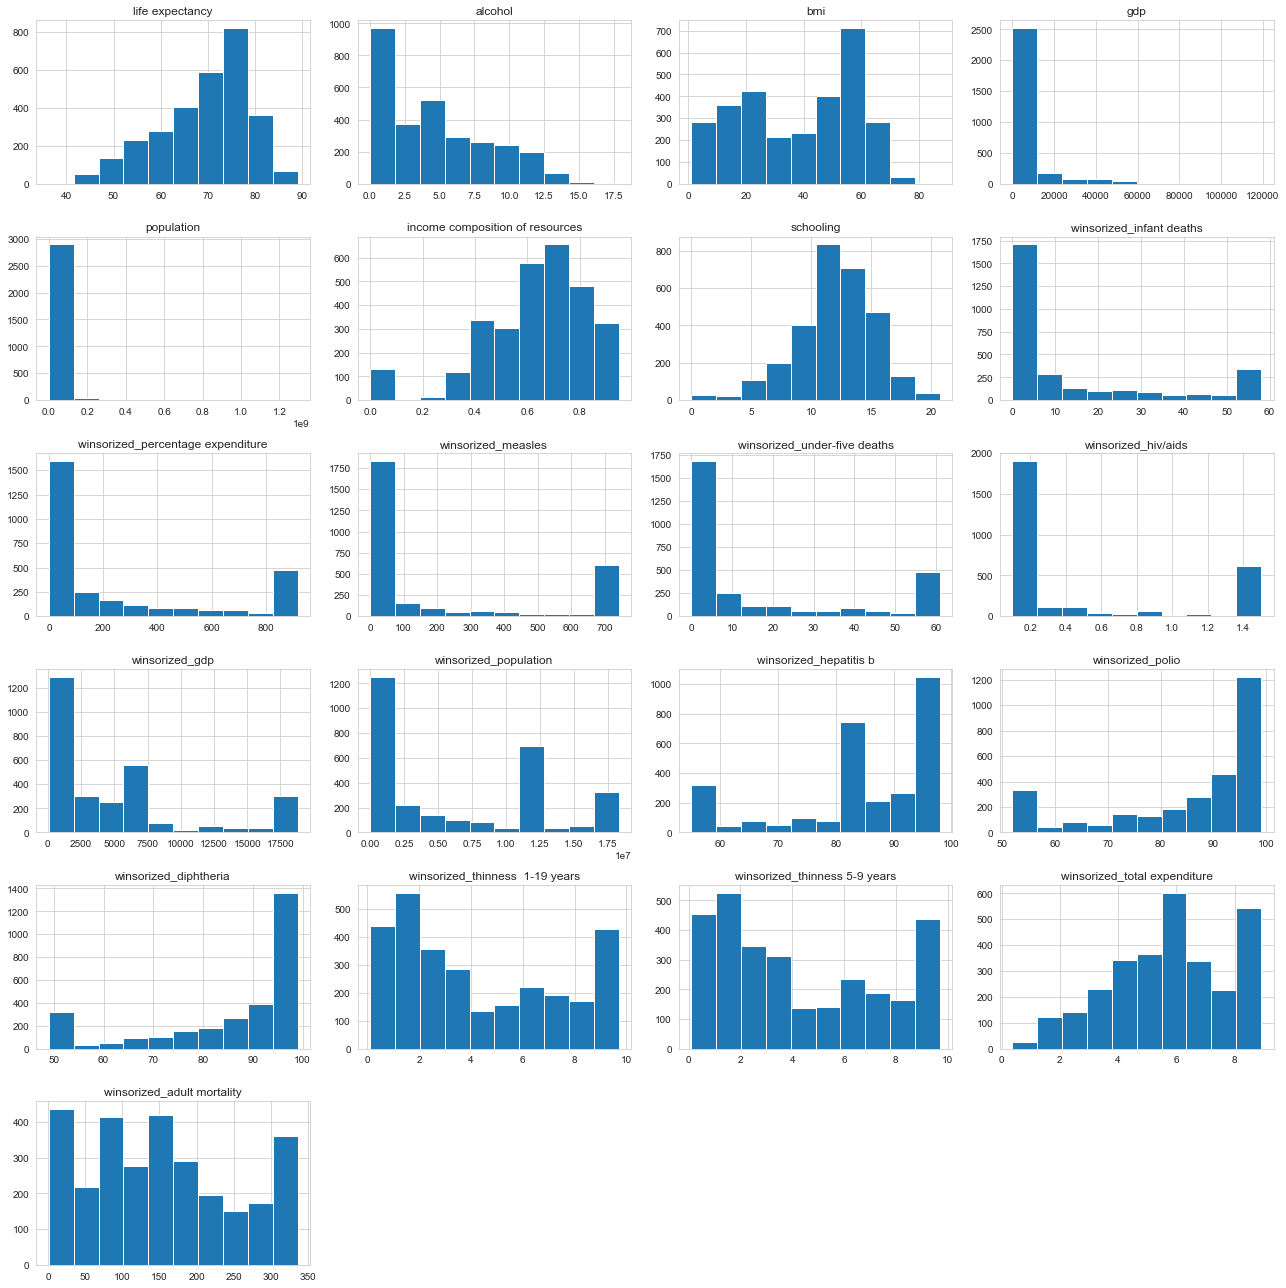

In [26]:
plt.figure(figsize=(18, 18))
plot_number = 1
for feature in feature_list:
    ax = plt.subplot(6, 4, plot_number)
    plt.hist(life_exp[feature])
    ax.set_title(feature)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

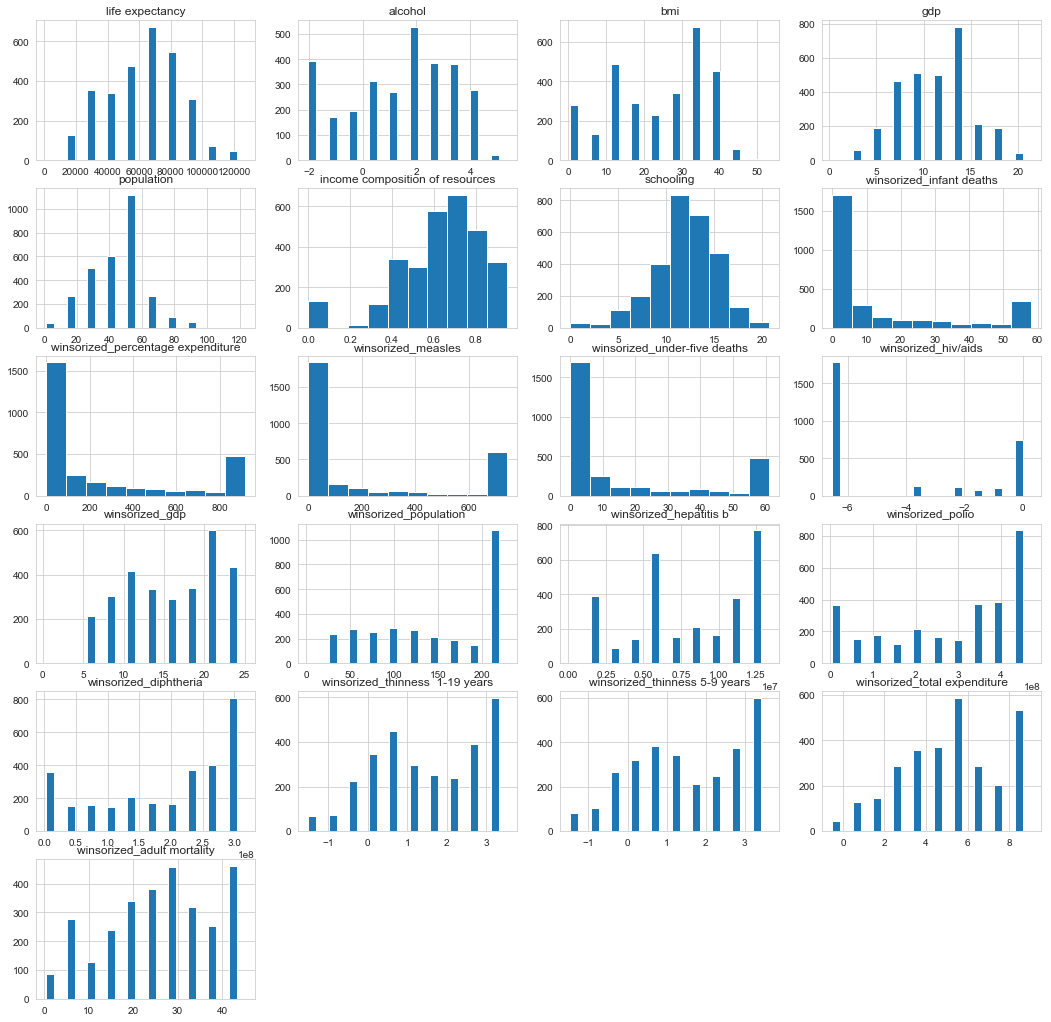

In [27]:
from scipy.stats import boxcox
plt.figure(figsize=(18, 18))
plot_number = 1
for feature in feature_list:
    ax = plt.subplot(6, 4, plot_number)
    if min(life_exp[feature])<=0:
        plt.hist(life_exp[feature])
    else:
        plt.hist(boxcox(life_exp[feature]))
    ax.set_title(feature)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1

In [28]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
for feature in feature_list:
    jb_stats = jarque_bera(life_exp[feature])
    norm_stats = normaltest(life_exp[feature])
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
    print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
    print('----------------------------------------------------------------')

Jarque-Bera test statistics is 206.46122079537412 and p value is 0.0
Normality test statistics is 177.68826646794312 and p value is 2.603054056499481e-39
----------------------------------------------------------------
Jarque-Bera test statistics is 233.49301092973036 and p value is 0.0
Normality test statistics is 275.8483734693906 and p value is 1.2597569996551355e-60
----------------------------------------------------------------
Jarque-Bera test statistics is 221.53782021592096 and p value is 0.0
Normality test statistics is 5362.005677611551 and p value is 0.0
----------------------------------------------------------------
Jarque-Bera test statistics is 33697.428353312214 and p value is 0.0
Normality test statistics is 2177.704574189041 and p value is 0.0
----------------------------------------------------------------
Jarque-Bera test statistics is 18118469.72844007 and p value is 0.0
Normality test statistics is 6184.130246740139 and p value is 0.0
----------------------------

In [29]:
life_exp.corr()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,...,winsorized_gdp,winsorized_population,winsorized_hepatitis b,winsorized_polio,winsorized_diphtheria,winsorized_thinness 1-19 years,winsorized_thinness 5-9 years,winsorized_total expenditure,winsorized_adult mortality,winsorized_schooling
year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,...,0.101009,0.039429,0.134055,0.116654,0.147497,-0.040994,-0.039406,0.068140,-0.052195,0.194688
life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,...,0.497711,0.010223,0.286702,0.572282,0.572167,-0.588101,-0.588686,0.212888,-0.658149,0.743657
adult mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,...,-0.313278,0.000937,-0.194515,-0.341463,-0.336520,0.396025,0.404477,-0.106746,0.954135,-0.448758
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,...,-0.144533,0.182764,-0.198502,-0.231920,-0.226575,0.237615,0.237981,-0.135254,0.088099,-0.208666
alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,...,0.391276,-0.038618,0.102125,0.264395,0.265065,-0.457759,-0.448831,0.307662,-0.214092,0.525744
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,...,0.665627,-0.049885,0.007757,0.178090,0.174774,-0.297858,-0.303625,0.157492,-0.267645,0.411543
hepatitis b,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,...,0.096988,-0.003890,0.921309,0.456486,0.512593,-0.080760,-0.087706,0.068886,-0.134818,0.183639
measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,...,-0.087970,0.072843,-0.110578,-0.167707,-0.166948,0.156902,0.156470,-0.108598,0.030659,-0.130841
bmi,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,...,0.343232,-0.010276,0.183111,0.342230,0.337845,-0.572903,-0.584414,0.223055,-0.393436,0.538966
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,...,-0.150320,0.184902,-0.207776,-0.253102,-0.248979,0.249006,0.248477,-0.136618,0.102709,-0.223633


In [30]:
life_exp = pd.concat([life_exp, pd.get_dummies(life_exp["status"])], axis=1)
life_exp.head()

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,winsorized_hepatitis b,winsorized_polio,winsorized_diphtheria,winsorized_thinness 1-19 years,winsorized_thinness 5-9 years,winsorized_total expenditure,winsorized_adult mortality,winsorized_schooling,developed,developing
0,afghanistan,2015,developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,52.0,65.0,9.7,9.7,8.16,263.0,10.1,0,1
1,afghanistan,2014,developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,58.0,62.0,9.7,9.7,8.18,271.0,10.0,0,1
2,afghanistan,2013,developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,62.0,64.0,9.7,9.7,8.13,268.0,9.9,0,1
3,afghanistan,2012,developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,67.0,67.0,9.7,9.7,8.52,272.0,9.8,0,1
4,afghanistan,2011,developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,68.0,68.0,9.7,9.7,7.87,275.0,9.5,0,1


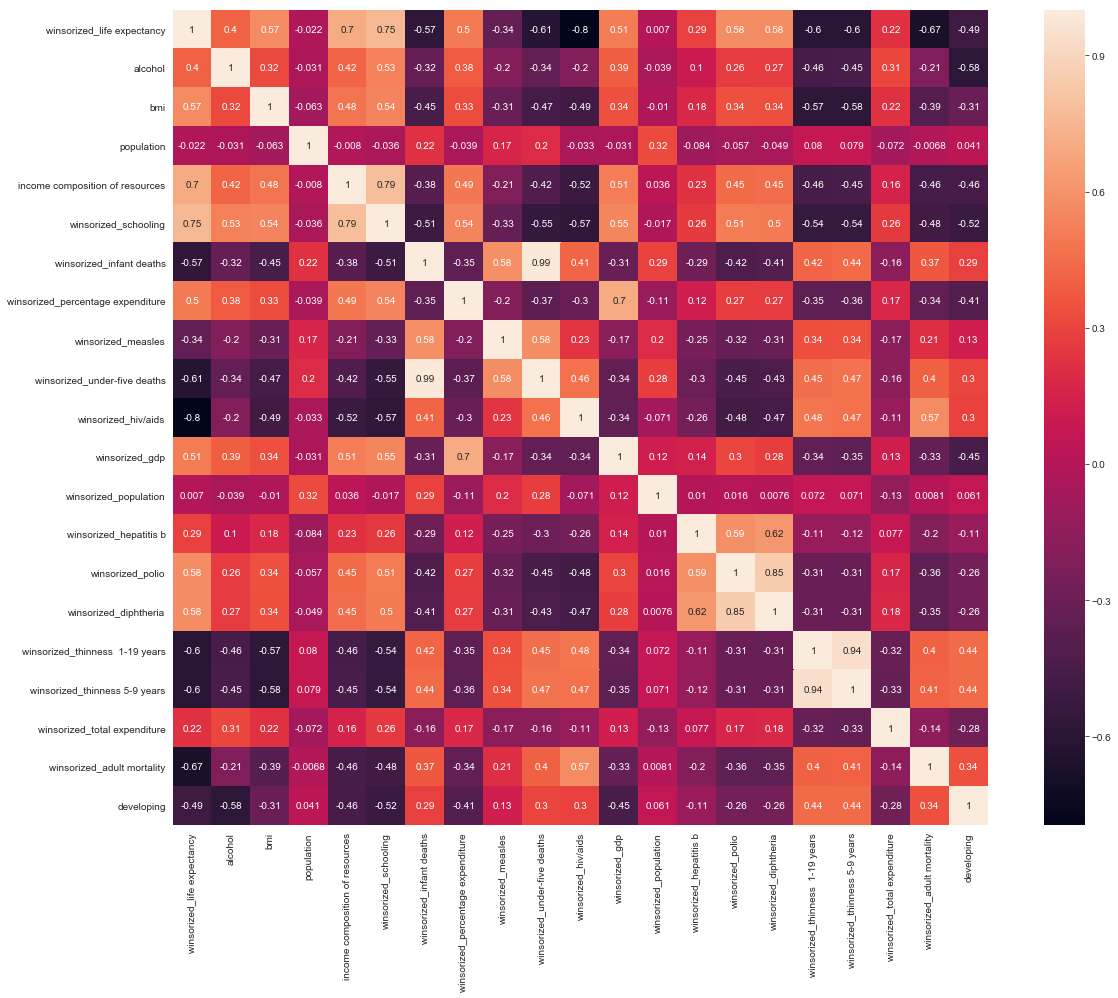

In [31]:
updated_features = life_exp[['winsorized_life expectancy','alcohol','bmi',
        'population', 'income composition of resources', 'winsorized_schooling',
       'winsorized_infant deaths', 'winsorized_percentage expenditure',
       'winsorized_measles', 'winsorized_under-five deaths',
       'winsorized_hiv/aids', 'winsorized_gdp', 'winsorized_population',
       'winsorized_hepatitis b', 'winsorized_polio', 'winsorized_diphtheria',
       'winsorized_thinness  1-19 years', 'winsorized_thinness 5-9 years',
       'winsorized_total expenditure', 'winsorized_adult mortality', 'developing']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(updated_features, square=True, annot=True)

In [32]:
numeric_columns = life_exp.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling',
       'winsorized_life expectancy', 'winsorized_infant deaths',
       'winsorized_percentage expenditure', 'winsorized_measles',
       'winsorized_under-five deaths', 'winsorized_hiv/aids', 'winsorized_gdp',
       'winsorized_population', 'winsorized_hepatitis b', 'winsorized_polio',
       'winsorized_diphtheria', 'winsorized_thinness  1-19 years',
       'winsorized_thinness 5-9 years', 'winsorized_total expenditure',
       'winsorized_adult mortality', 'winsorized_schooling'],
      dtype='object')
The number of numerical columns is 36


In [33]:
np.abs(life_exp[numeric_columns].iloc[:,1:].corr().loc[:,"winsorized_life expectancy"]).sort_values(ascending=False)

winsorized_life expectancy           1.000000
life expectancy                      0.995171
winsorized_hiv/aids                  0.795563
winsorized_schooling                 0.754520
schooling                            0.726038
income composition of resources      0.700224
adult mortality                      0.690200
winsorized_adult mortality           0.669998
winsorized_under-five deaths         0.614186
winsorized_thinness 5-9 years        0.600416
winsorized_thinness  1-19 years      0.599461
winsorized_polio                     0.577304
winsorized_diphtheria                0.575523
winsorized_infant deaths             0.569371
bmi                                  0.566255
hiv/aids                             0.522039
winsorized_gdp                       0.505705
winsorized_percentage expenditure    0.496726
thinness  1-19 years                 0.483731
thinness 5-9 years                   0.478457
diphtheria                           0.478110
polio                             

In [34]:
life_exp.groupby('country')["life expectancy"].mean().sort_values()

country
sierra leone                                            46.11250
central african republic                                48.51250
lesotho                                                 48.78125
angola                                                  49.01875
malawi                                                  49.89375
chad                                                    50.38750
côte d'ivoire                                           50.38750
zimbabwe                                                50.48750
swaziland                                               51.32500
nigeria                                                 51.35625
somalia                                                 53.31875
mozambique                                              53.39375
south sudan                                             53.87500
zambia                                                  53.90625
cameroon                                                54.01875
mali             

In [35]:
life_exp.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling',
       'winsorized_life expectancy', 'winsorized_infant deaths',
       'winsorized_percentage expenditure', 'winsorized_measles',
       'winsorized_under-five deaths', 'winsorized_hiv/aids', 'winsorized_gdp',
       'winsorized_population', 'winsorized_hepatitis b', 'winsorized_polio',
       'winsorized_diphtheria', 'winsorized_thinness  1-19 years',
       'winsorized_thinness 5-9 years', 'winsorized_total expenditure',
       'winsorized_adult mortality', 'winsorized_schooling', 'developed',
       'developing'],
      dtype='object')

After cleaning and exploring the data set of life expectancy information, I looked more closely at the correlation between the numerical values. I created a heatmap to show a visualization of the correlations between features in the data set. I eliminated some variables first including: year, status, the dummy variable, ‘developed’ and any original variables that had been winsorized. A couple of correlations stood out right away. There are variables that are naturally highly correlated. For example, 'winsorized_infant deaths' and 'winsorized_under-five deaths' have a 0.99 correlation, 'winsorized_thinness 5-9 years' and 'winsorized_thinness  1-19 years' have a 0.94 correlation. This makes sense because there is overlap in the ages for each group. I would drop 'winsorized_infant deaths' and 'winsorized_thinness 5-9 years' because these values should be covered by the other variable. Another pair of highly correlated variables is 'winsorized_diphtheria' and 'winsorized_polio' with a value of 0.85. I would drop either of them because they both have the same correlation with 'winsorized_life expectancy' with a value of 0.58. I find that correlation to be interesting because I would expect it to be negative or at least very small if positive. My next steps might be to dig deeper into the original data for 'diphtheria' and 'polio' to see if winsorizing or filling in missing values had an impact on the correlation. 

Lastly, I took a closer look at the variables that I believed would impact life expectancy by either increasing or decreasing. I used the heatmap to identify negative values less than -0.6 and positive values greater than 0.6. These values indicate a strong correlation to the target. For feature selection, I would choose the variables, 'winsorized_schooling' and 'income composition of resources' for the features that have a positive impact on 'winsorized_life expectancy' because their r-values are 0.75 and 0.7, respectively. For variables that have a negative impact on life expectancy, I would choose, 'winsorized_hiv/aids', 'winsorized_under-five deaths' and 'winsorized_adult mortality' because their r-values are -0.8, -0.61 and -0.67, respectively.